# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm

In [2]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [6]:
athletes = pd.read_csv("athletes.csv", index_col = 0)

In [51]:
athletes.head()

,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
id,,,,,,,,,,
736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [8]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [9]:
# Sua análise começa aqui.

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [128]:
def q1():
    # Retorne aqui o resultado da questão 1.
    s = get_sample(athletes, col_name = 'height', n = 3000)
    _,p = sct.shapiro(s)
    print('p-value q1: %.5f' %p)
    
    # Para ser normalmente distribuida p deve ser  > 5%
    return bool(p > 0.05)
    
q1()

p-value q1: 0.00000


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

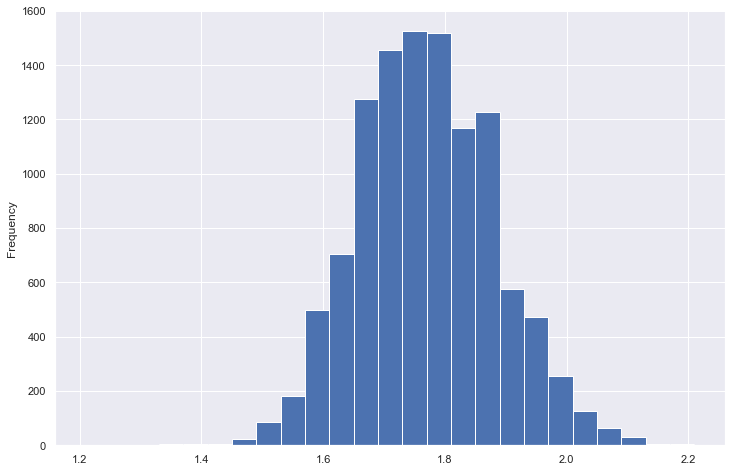

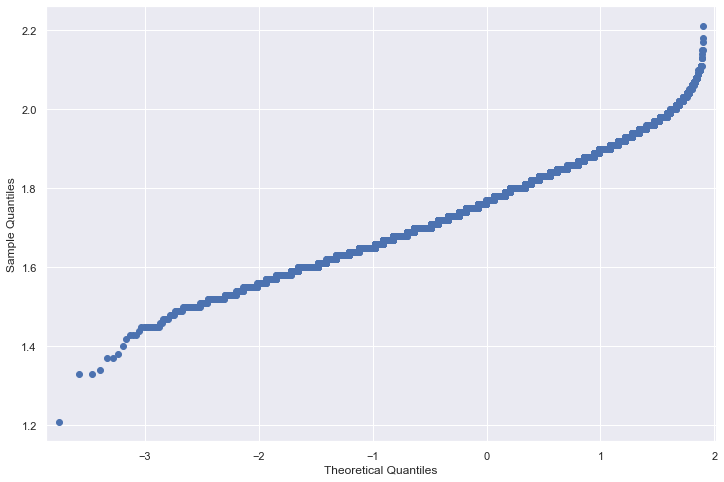

In [137]:
if __name__=='__main__':
    athletes['height'].plot(kind ='hist', bins = 25)
    
    sm.qqplot(athletes['height'])
    plt.show()

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [129]:
def q2():
    # Retorne aqui o resultado da questão 2.
    s = get_sample(athletes, col_name = 'height', n = 3000)
    _,p = sct.jarque_bera(s)
    
    print('p-value q2: %.5f' %p)
    
    # Para ser normalmente distribuida p deve ser  > 5%
    return bool(p > 0.05)

q2()

p-value q2: 0.00148


False

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [138]:
def q3():
    # Retorne aqui o resultado da questão 3.
    s = get_sample(athletes, col_name = 'weight', n = 3000)
    _,p = sct.normaltest(s)
    
    print('p-value q3: %.5f' %p)
    
    # Para ser normalmente distribuida p deve ser  > 5%
    return bool(p > 0.05)

q3()

p-value q3: 0.00000


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

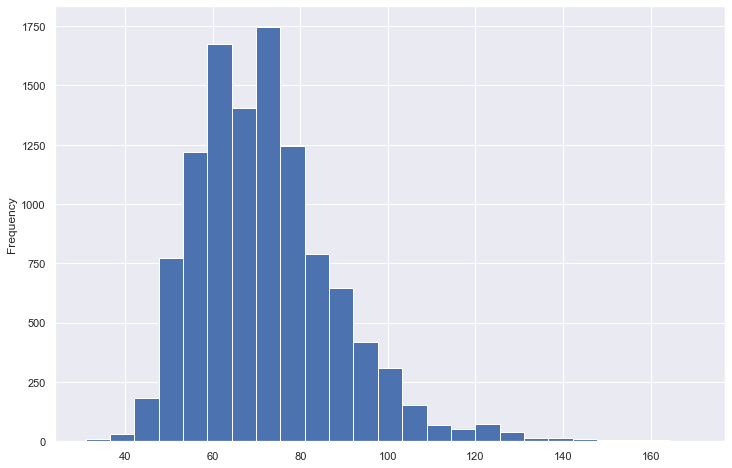

In [55]:
if __name__=='__main__':
    athletes['weight'].plot(kind ='hist', bins = 25)
    plt.show()

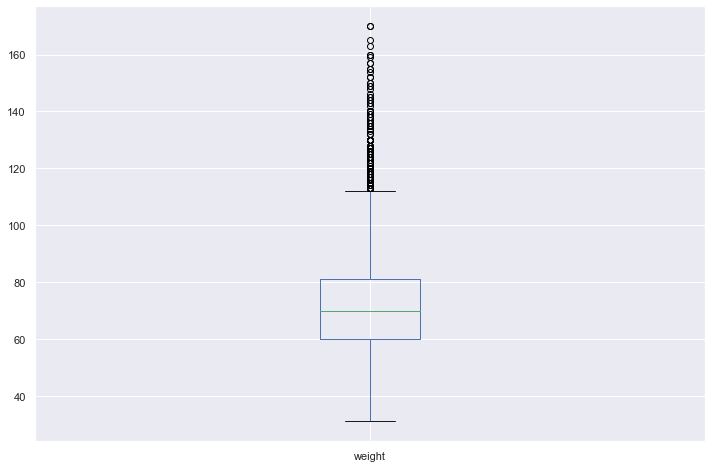

In [60]:
if __name__=='__main__':
    athletes['weight'].plot(kind ='box')
    plt.show()

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [139]:
def q4():
    # Retorne aqui o resultado da questão 4.
    s = np.log(get_sample(athletes, col_name = 'weight', n = 3000))
    _,p = sct.normaltest(s)
    
    print('p-value q4: %.5f' %p)
    
    # Para ser normalmente distribuida p deve ser  > 5%
    return bool(p > 0.05)

q4()

p-value q4: 0.00000


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

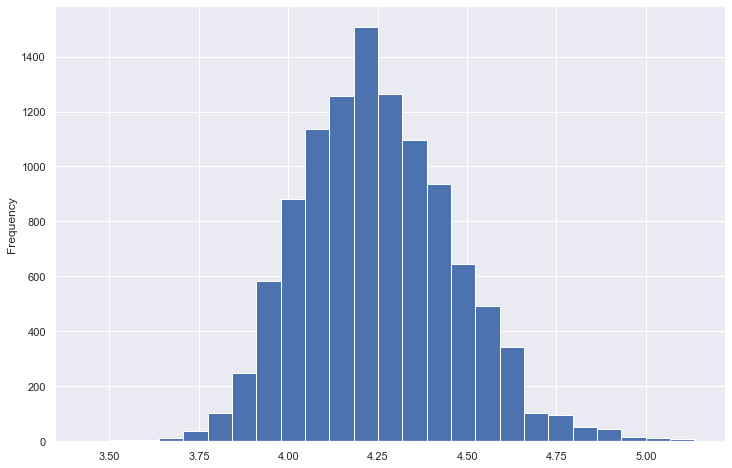

In [62]:
if __name__=='__main__':
    np.log(athletes['weight']).plot(kind ='hist', bins = 25)
    plt.show()

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [70]:
bra = athletes[athletes.nationality == 'BRA']
usa = athletes[athletes.nationality == 'USA']
can = athletes[athletes.nationality == 'CAN']

In [148]:
def q5():
    # Retorne aqui o resultado da questão 5.
    _, p = sct.ttest_ind(bra.height.dropna(), usa.height.dropna(), equal_var = False)
    
    print('p-value q5: %.5f' %p)
    
    # Para ser normalmente distribuida p deve ser  > 5%
    return bool(p > 0.05)

q5()

p-value q5: 0.00131


False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [149]:
def q6():
    
    # Retorne aqui o resultado da questão 6.
    _, p = sct.ttest_ind(bra.height.dropna(), can.height.dropna(), equal_var = False)
    
    print('p-value q6: %.5f' %p)
    
    # Para ser normalmente distribuida p deve ser  > 5%
    return bool(p > 0.05)

q6()

p-value q6: 0.52308


True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [150]:
def q7():
    # Retorne aqui o resultado da questão 7.
    _, p = sct.ttest_ind(usa.height.dropna(), can.height.dropna(), equal_var = False)
    
    print('p-value q7: %.5f' %p)
    
    return float(np.round(p, 8))

q7()

p-value q7: 0.00047


0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?

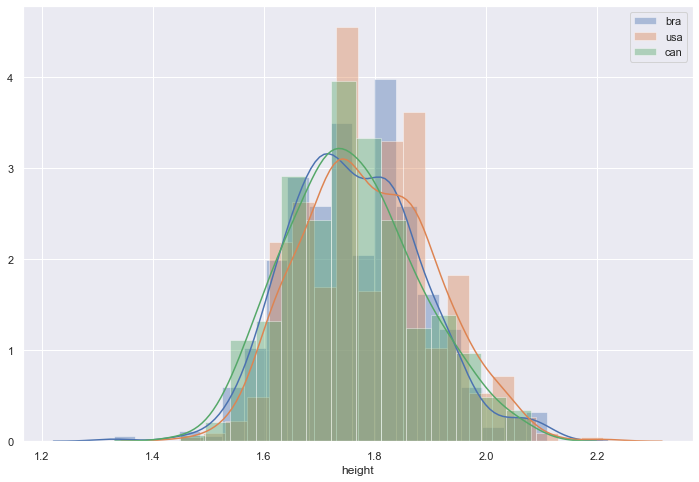

In [122]:
if __name__=='__main__':
    
    sns.distplot(bra.height.dropna(), label = 'bra')
    sns.distplot(usa.height.dropna(), label = 'usa')
    sns.distplot(can.height.dropna(), label = 'can')
    plt.legend()
    plt.show()